# Importing Libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset and Setting Style

In [136]:
df = pd.read_csv("netflix_dataset.csv")
sns.set_style("whitegrid")

# Data Preprocessing

## Basic Inspection

In [137]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [139]:
df.shape

(8807, 12)

In [140]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Handling Missing Values

In [141]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [142]:
df.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown'
}, inplace=True)
df.dropna(subset=['rating', 'date_added'], inplace=True)

## Converting Date Column

In [143]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.strftime('%b')

## Feature Engineering

In [144]:
df['duration_min'] = np.nan

df.loc[df['type'] == 'Movie', 'duration_min'] = (
    df.loc[df['type'] == 'Movie', 'duration']
      .str.replace(' min', '', regex=False)
      .astype(float)
)

In [145]:
df['seasons'] = np.nan

df.loc[df['type'] == 'TV Show', 'seasons'] = (
    df.loc[df['type'] == 'TV Show', 'duration']
      .str.replace(' Seasons', '', regex=False)
      .str.replace(' Season', '', regex=False)
      .astype(int)
)

## Spliting Multi-Value Columns

In [146]:
genres = df['listed_in'].str.split(', ', expand=True)

In [147]:
df_genre = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre').reset_index(drop=True)

## Remove Duplicates

In [148]:
df.drop_duplicates(inplace=True)

# Visualization Ideas (Matplotlib + Seaborn)

## A. Content-Based Questions

### 1.) How many Movies vs TV Shows are available?

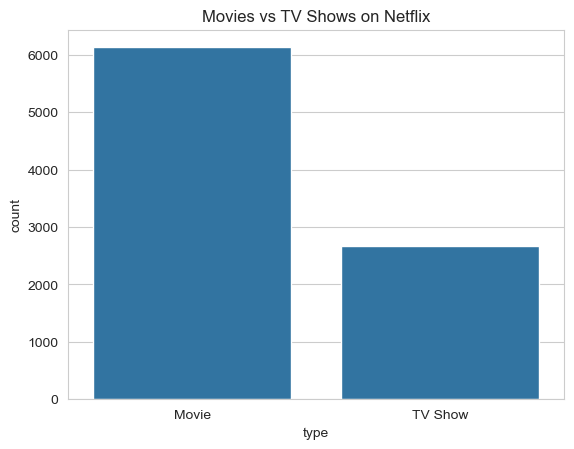

In [149]:
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()

Netflix has more Movies than TV Shows, indicating movies are still its primary content volume driver.

### 2.) What is the distribution of content ratings (TV-MA, PG-13, etc.)?

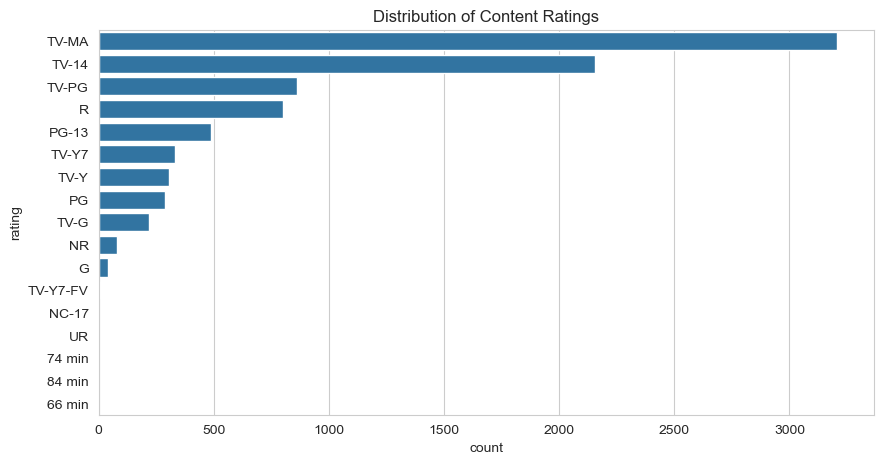

In [150]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.show()

Ratings like TV-MA and TV-14 dominate, showing Netflix focuses more on mature and teen audiences.

### 3.) What are the most common genres ?

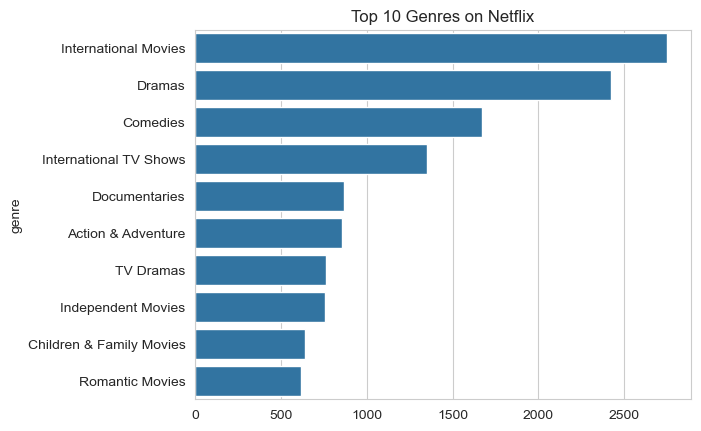

In [151]:
top_genre = df_genre['genre'].value_counts().head(10)
sns.barplot(x=top_genre.values, y=top_genre.index)
plt.title("Top 10 Genres on Netflix")
plt.show()

International Movies, Drama and Comedies are the most common genres, reflecting broad audience targeting.

### 4.) Which genres are more popular in Movies vs TV Shows?

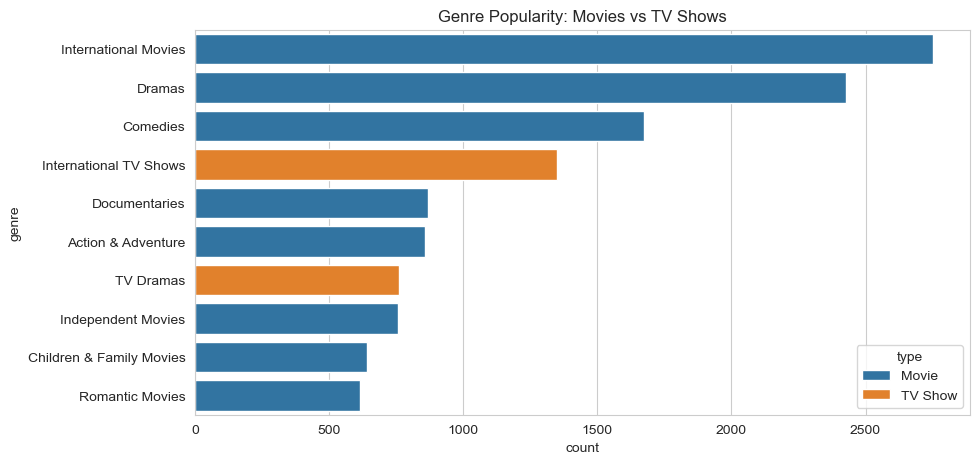

In [152]:
plt.figure(figsize=(10,5))
sns.countplot(y='genre', hue='type',
              data=df_genre,
              order=df_genre['genre'].value_counts().head(10).index)
plt.title("Genre Popularity: Movies vs TV Shows")
plt.show()

- Movies dominate Drama & International content
- TV Shows dominate TV Dramas & Docuseries

### 5.) Average duration of movies (in minutes).

In [153]:
df['duration_min'].mean()

99.58488410055502

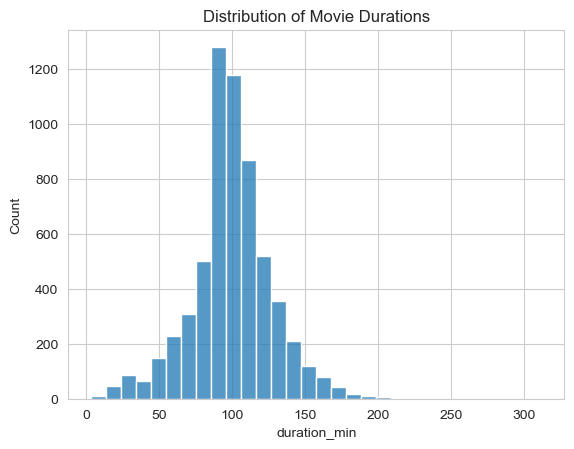

In [154]:
sns.histplot(df['duration_min'].dropna(), bins=30)
plt.title("Distribution of Movie Durations")
plt.show()

Most Netflix movies are between 80–120 minutes, aligning with standard feature film length.

### 6.) Number of seasons distribution for TV shows.

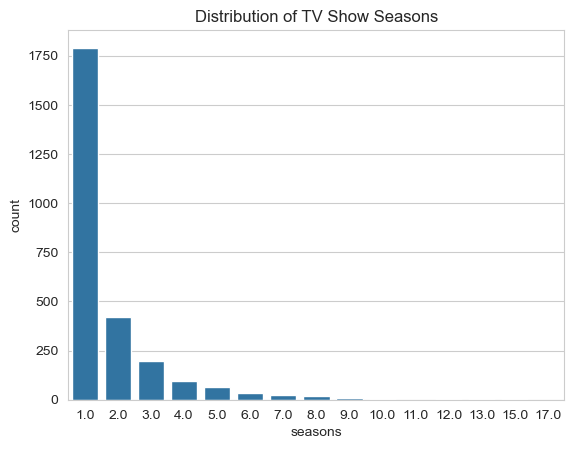

In [155]:
sns.countplot(x='seasons', data=df[df['type']=='TV Show'])
plt.title("Distribution of TV Show Seasons")
plt.show()

Majority of TV shows have 1–2 seasons, indicating Netflix favors shorter series.

## B. Time-Based Questions

### 7.) How has Netflix content grown year-wise?

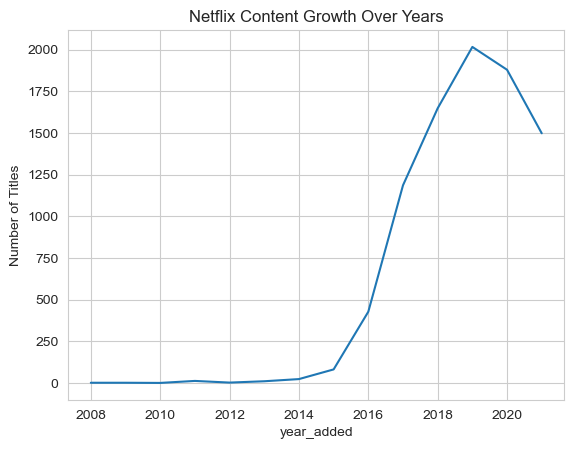

In [156]:
df.groupby('year_added')['show_id'].count().plot(kind='line')
plt.title("Netflix Content Growth Over Years")
plt.ylabel("Number of Titles")
plt.show()

Strong growth after 2015, reflecting Netflix’s global expansion phase.

### 8.) Which year had the maximum content additions?

In [157]:
df['year_added'].value_counts().idxmax()

2019

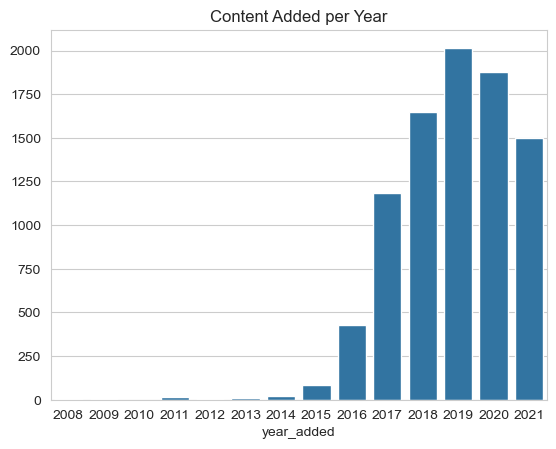

In [158]:
year_added = df['year_added'].value_counts()
sns.barplot(y=year_added.values, x=year_added.index)
plt.title("Content Added per Year")
plt.show()

Peak content additions occurred around 2019–2020.

### 9.) Monthly trend: Which months see more content releases?

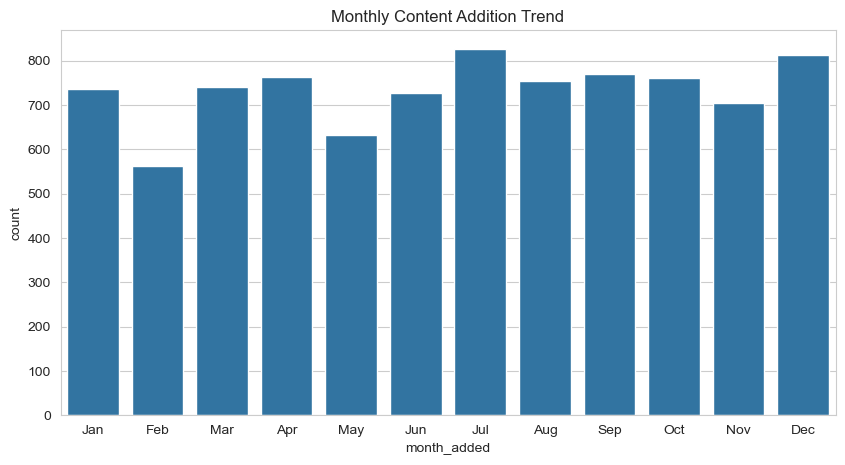

In [169]:
month_order = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]
plt.figure(figsize=(10,5))
sns.countplot(x='month_added', data=df, order=month_order)
plt.title("Monthly Content Addition Trend")
plt.show()

Netflix releases more content during mid-year and year-end months.

### 10.) Difference between release_year and date_added (content delay).

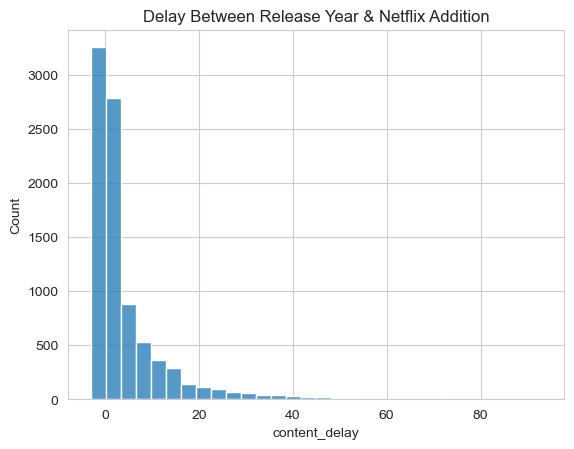

In [170]:
df['content_delay'] = df['year_added'] - df['release_year']
sns.histplot(df['content_delay'], bins=30)
plt.title("Delay Between Release Year & Netflix Addition")
plt.show()

Most content is added within 1–3 years of release, but older classics are also included.

## C. Country / Geography-Based Questions

### 11.) Which countries produce the most content?

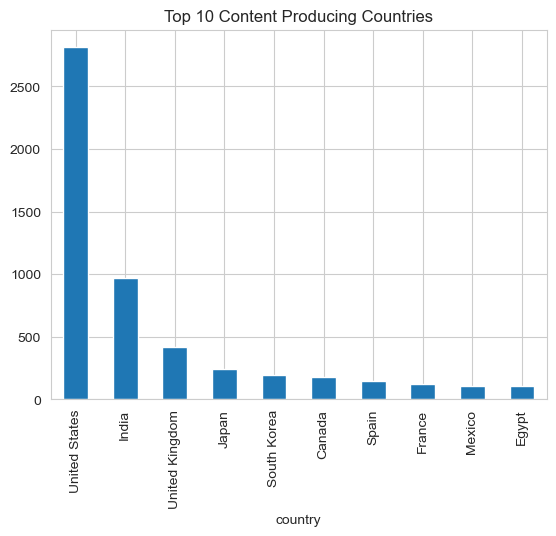

In [175]:
df[df['country'] != 'Unknown']['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Content Producing Countries")
plt.show()

The United States dominates, followed by India and the UK.

### 12.) Top 10 countries by Movies and TV Shows separately.

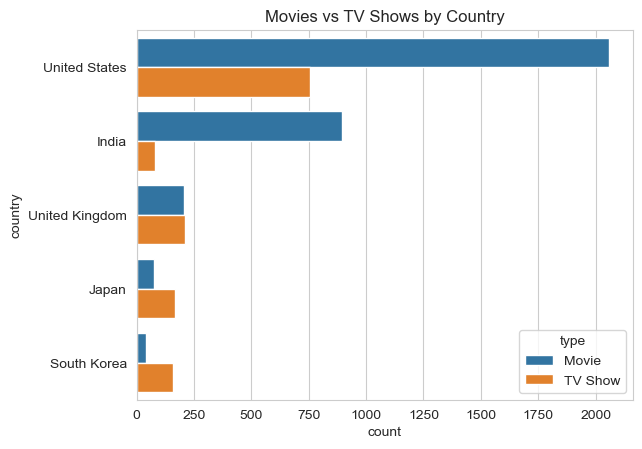

In [174]:
top_countries = df[df['country'] != 'Unknown']['country'].value_counts().head(5).index
sns.countplot(y='country', hue='type',
              data=df[df['country'].isin(top_countries)])
plt.title("Movies vs TV Shows by Country")
plt.show()

The US and India produces more movies, while some countries contribute proportionally more TV shows.

### 13.) Does content from the US dominate Netflix?

Yes — clearly visible through content volume and genre spread.

### 14.) Country vs genre relationship.

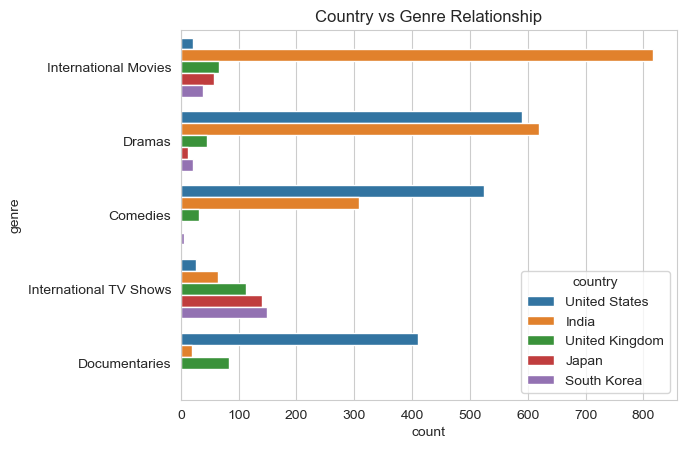

In [177]:
sns.countplot(y='genre', hue='country',
              data=df_genre[df_genre['country'].isin(top_countries)],
              order=df_genre['genre'].value_counts().head(5).index)
plt.title("Country vs Genre Relationship")
plt.show()

Different countries specialize in different genres (e.g., India → Dramas).

## D. Cast & Director Analysis

### 15.) Top directors with most content.

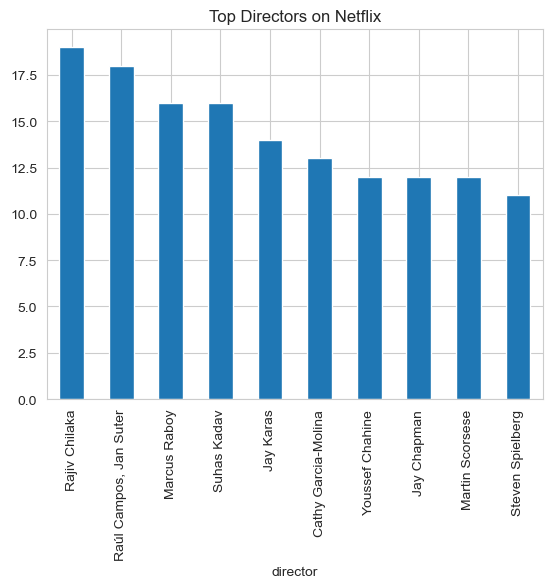

In [179]:
df[df['director'] != 'Unknown']['director'].value_counts().head(10).plot(kind='bar')
plt.title("Top Directors on Netflix")
plt.show()

Few directors contribute multiple titles, indicating long-term partnerships.

### 16.) Top actors appearing most frequently.

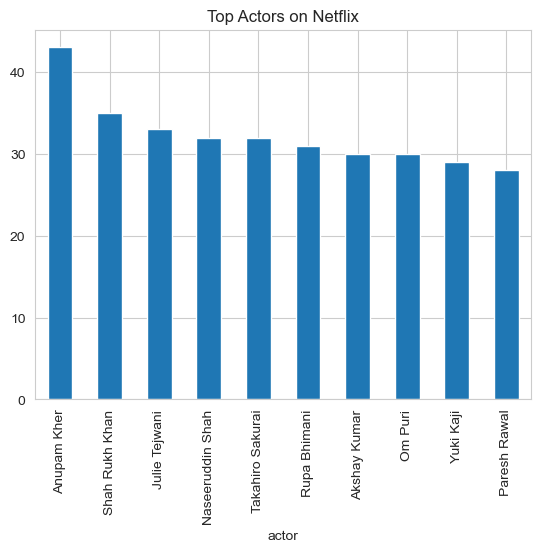

In [182]:
df_cast = df.assign(actor=df['cast'].str.split(', ')).explode('actor')
df_cast[df_cast['actor'] != 'Unknown']['actor'].value_counts().head(10).plot(kind='bar')
plt.title("Top Actors on Netflix")
plt.show()

Popular actors appear repeatedly, increasing content discoverability.

### 17.) Movies with multiple popular actors.

In [188]:
df_cast.groupby('title')['actor'].count().sort_values(ascending=False).head()

title
Social Distance           50
Black Mirror              50
Heartbreak High           47
COMEDIANS of the world    47
Creeped Out               47
Name: actor, dtype: int64

Ensemble casts are common in Netflix originals.

## E. Advanced / Insightful Questions (Impressive)

### 18.) Is Netflix focusing more on adult content over time?

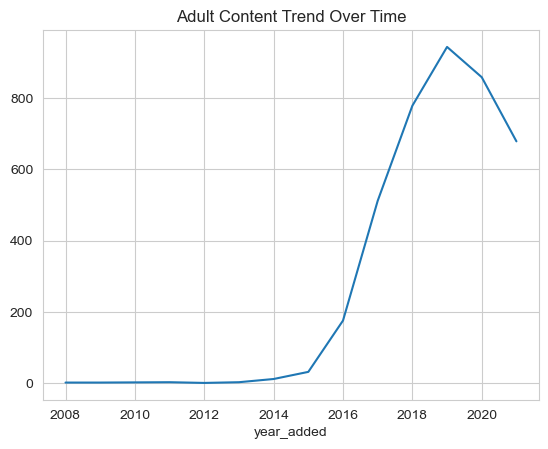

In [189]:
adult = df[df['rating'].isin(['TV-MA','R'])]
adult.groupby('year_added')['show_id'].count().plot(kind='line')
plt.title("Adult Content Trend Over Time")
plt.show()

Netflix is increasingly investing in adult-oriented content.

### 19.) Does movie duration change across years?

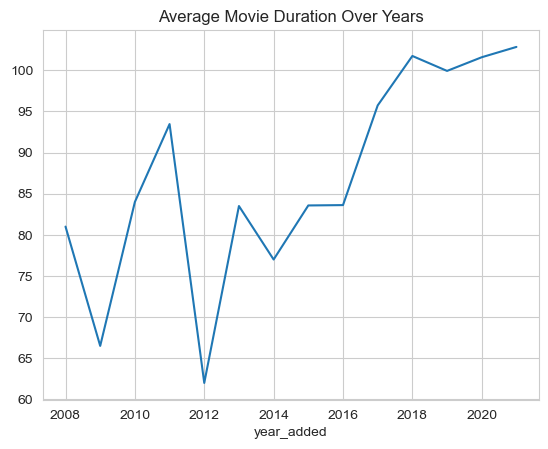

In [191]:
df.groupby('year_added')['duration_min'].mean().plot(kind='line')
plt.title("Average Movie Duration Over Years")
plt.show()

Movie durations remain relatively stable.

### 20.) Are TV shows getting more seasons over time?

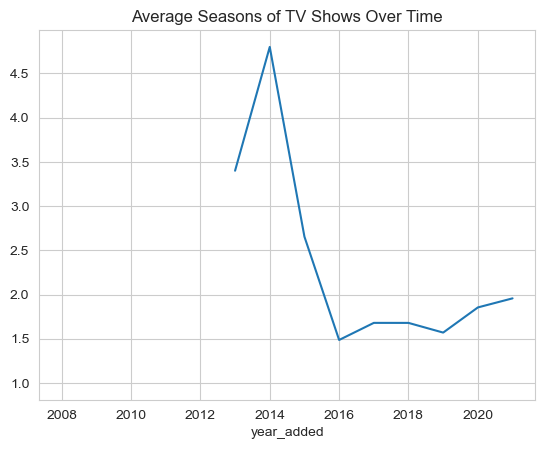

In [193]:
df.groupby('year_added')['seasons'].mean().plot(kind='line')
plt.title("Average Seasons of TV Shows Over Time")
plt.show()

No strong upward trend → Netflix prefers short-format series.

### 21.) Genre trend analysis across years.

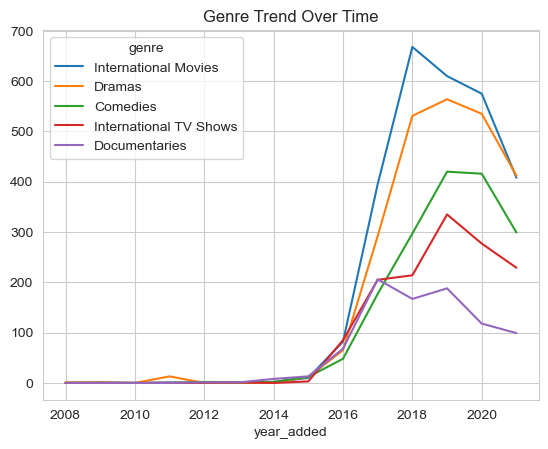

In [203]:
genre_year = df_genre.groupby(['year_added','genre']).size().unstack().fillna(0)
top_genre = df_genre['genre'].value_counts().head(5)
genre_year[top_genre.index].plot()
plt.title("Genre Trend Over Time")
plt.show()

International Movies and Dramas remains dominant, while documentaries show steady growth.